# Machine Learning Foundation

## Course 3, Part c: Support Vector Machines DEMO


## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.


In [1]:
import piplite as pl
await pl.install(['numpy','pandas','seaborn','scikit-learn','plotly','ipympl'])

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Part 1: Setup

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.


In [3]:
import pyodide_http as ph
ph.patch_all()
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Wine_Quality_Data.csv", sep=',')

In [4]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 634.5+ KB


In [6]:
data.color.unique()

array(['red', 'white'], dtype=object)

In [7]:
y = (data['color'] == 'red').astype(int) # change the object data into int
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int32

In [8]:
fields = list(data.columns[:-1])
# correlations = data[fields].corrwith(y).sort_values(ascending=False, key=abs)
correlations = data[fields].corrwith(y).sort_values()
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [9]:
data[fields].corrwith(y)

fixed_acidity           0.486740
volatile_acidity        0.653036
citric_acid            -0.187397
residual_sugar         -0.348821
chlorides               0.512678
free_sulfur_dioxide    -0.471644
total_sulfur_dioxide   -0.700357
density                 0.390645
pH                      0.329129
sulphates               0.487218
alcohol                -0.032970
quality                -0.119323
dtype: float64

In [10]:
sns.set_context('talk')
sns.set_style('white')

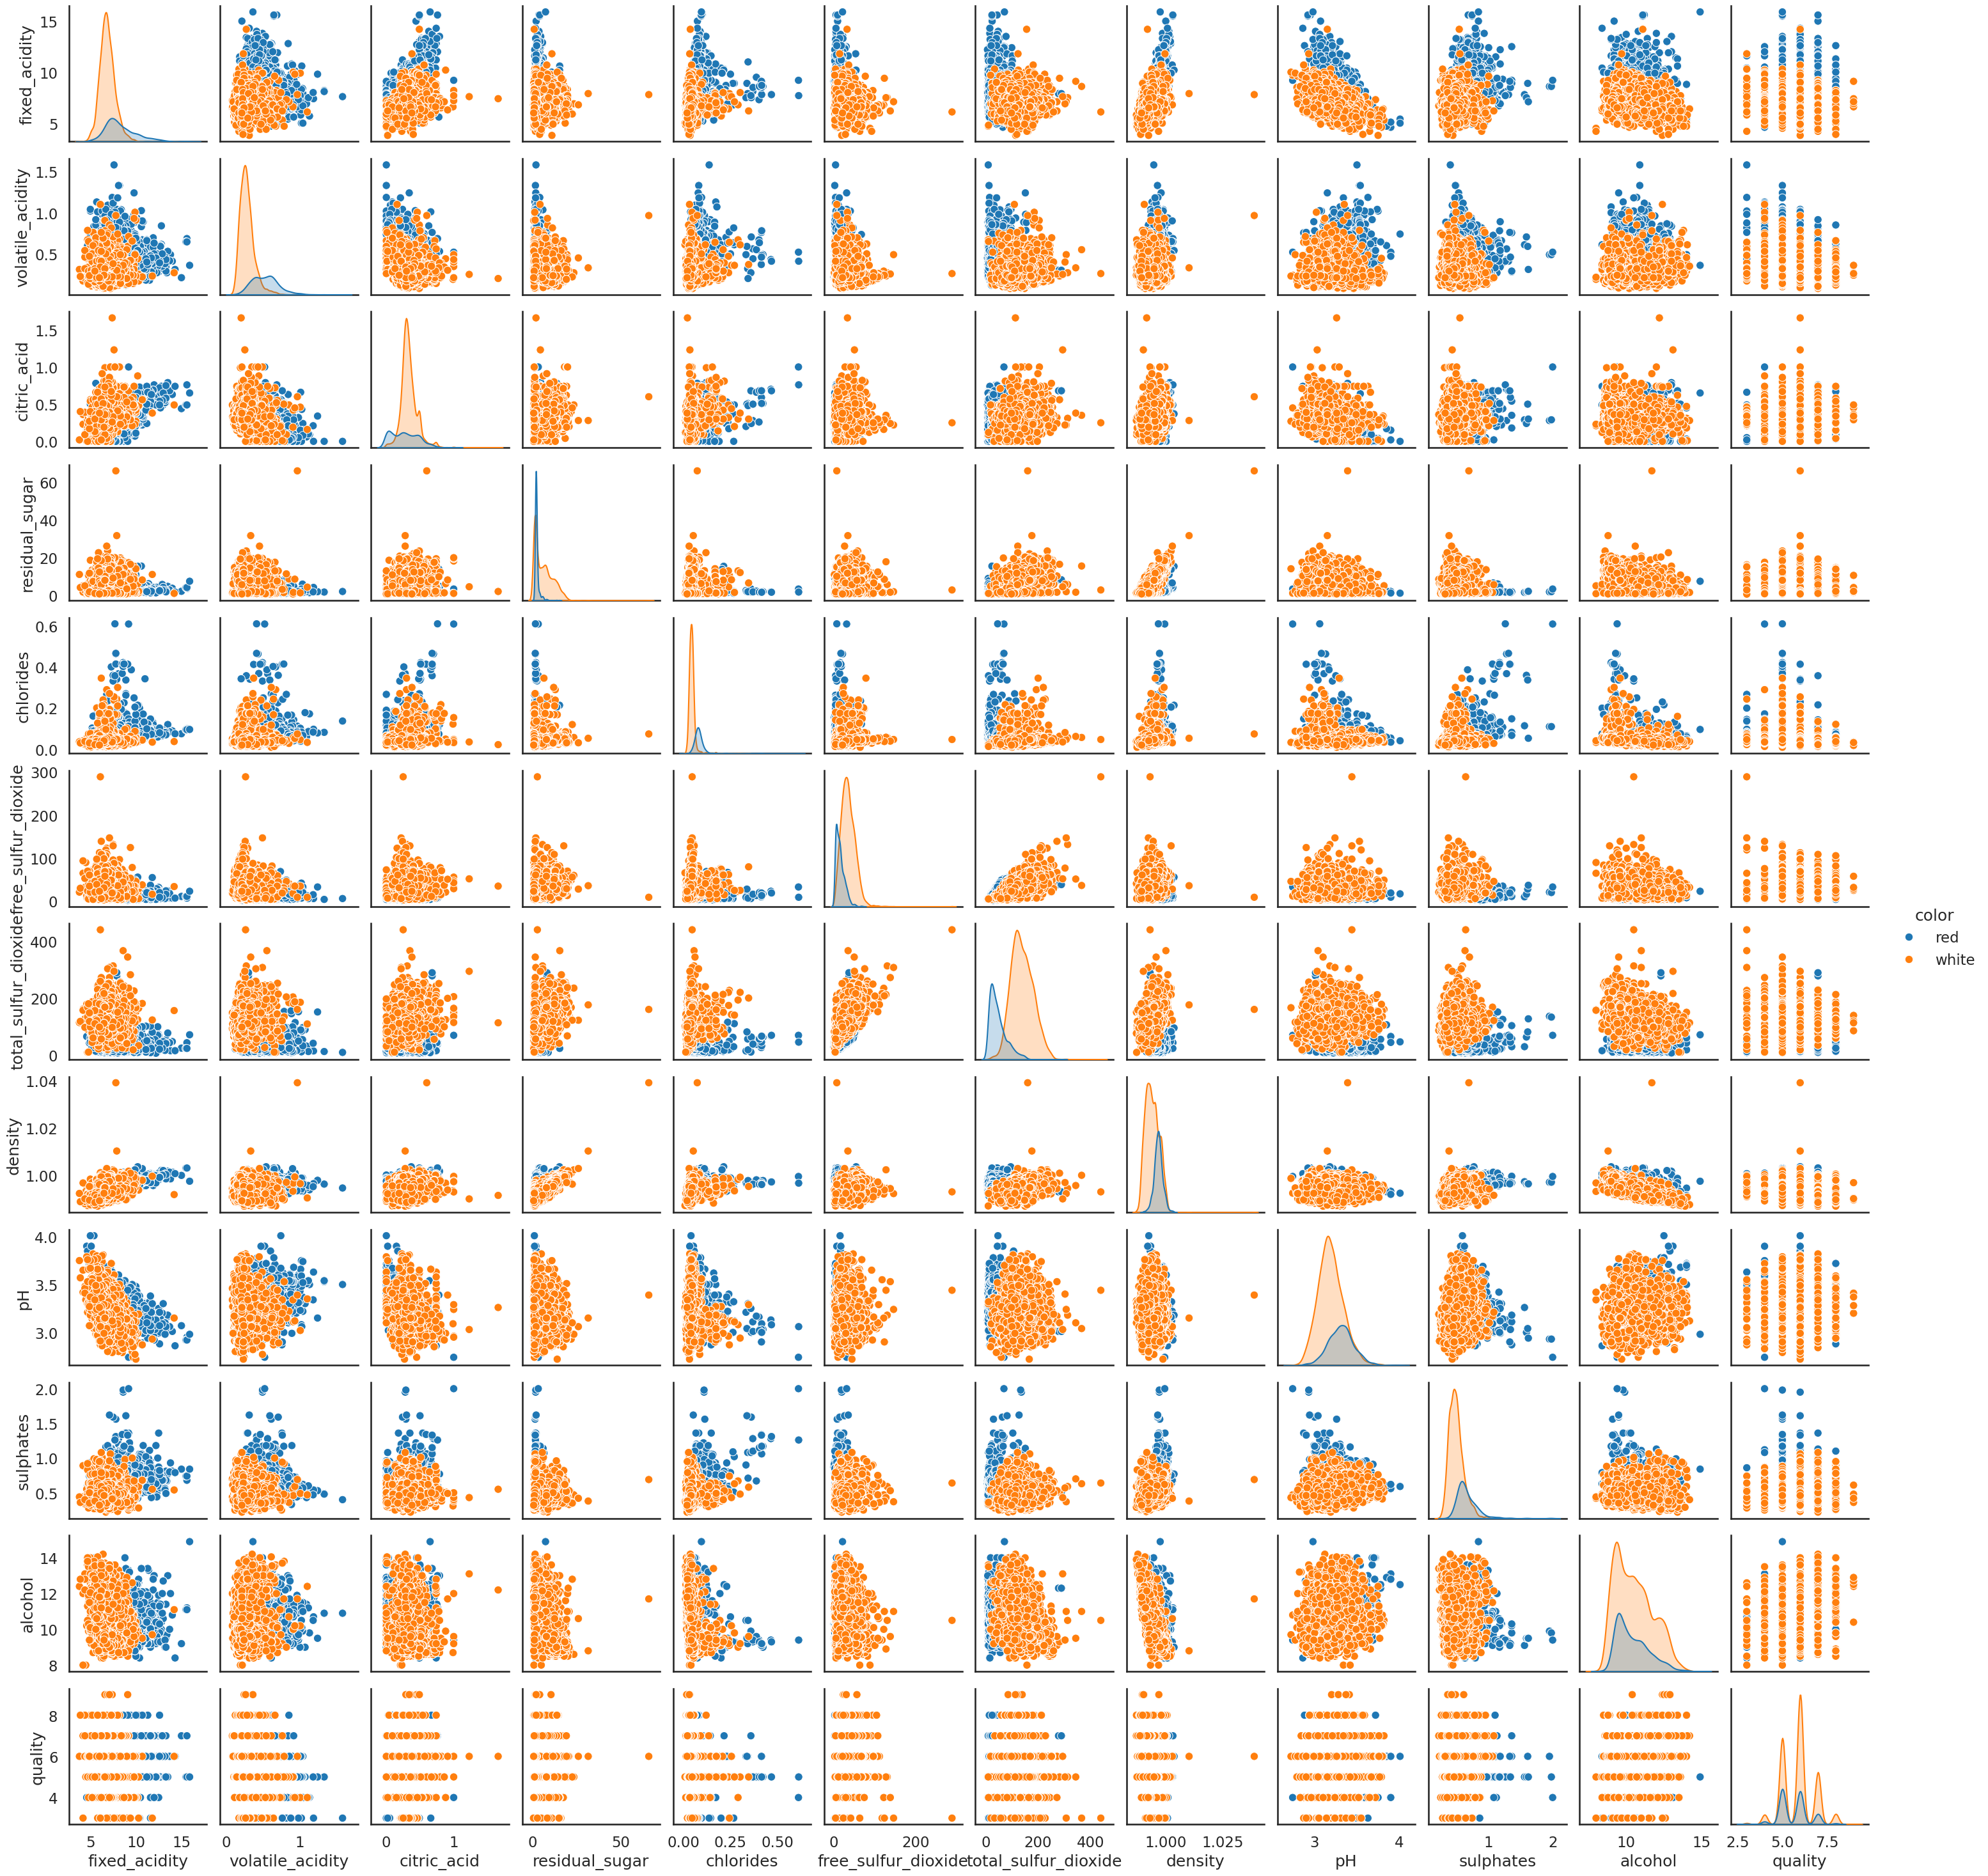

In [11]:
sns.pairplot(data, hue='color')

[(-1.0, 1.0), Text(0, 0.5, 'pearson correlation')]

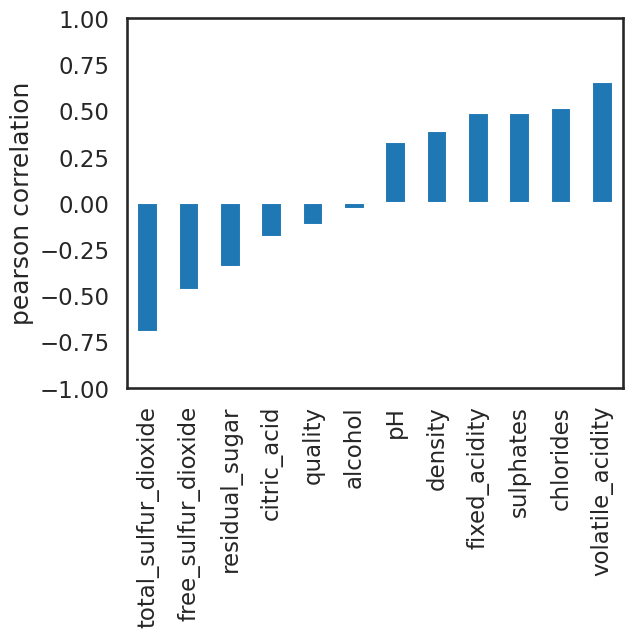

In [12]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1,1], ylabel='pearson correlation')

In [13]:
correlations.map(abs).sort_values()

alcohol                 0.032970
quality                 0.119323
citric_acid             0.187397
pH                      0.329129
residual_sugar          0.348821
density                 0.390645
free_sulfur_dioxide     0.471644
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
total_sulfur_dioxide    0.700357
dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index # takes last 2 values
fields

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')

In [15]:
X = data[fields]
X

volatile_acidity  total_sulfur_dioxide
0                 0.70                  34.0
1                 0.88                  67.0
2                 0.76                  54.0
3                 0.28                  60.0
4                 0.70                  34.0
...                ...                   ...
6492              0.21                  92.0
6493              0.32                 168.0
6494              0.24                 111.0
6495              0.29                 110.0
6496              0.21                  98.0

[6497 rows x 2 columns]

In [16]:
['%s_scaled'% fld for fld in fields]

['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled']

In [17]:
['Sir %s' % name for name in ['Htet','Aung', 'Lynn']]

['Sir Htet', 'Sir Aung', 'Sir Lynn']

In [18]:
scaler = MinMaxScaler()  # normalize
X = scaler.fit_transform(X) # array
X = pd.DataFrame(X, columns=['%s_scaled'% fld for fld in fields])
print(X.columns)

Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


In [19]:
X

volatile_acidity_scaled  total_sulfur_dioxide_scaled
0                    0.413333                     0.064516
1                    0.533333                     0.140553
2                    0.453333                     0.110599
3                    0.133333                     0.124424
4                    0.413333                     0.064516
...                       ...                          ...
6492                 0.086667                     0.198157
6493                 0.160000                     0.373272
6494                 0.106667                     0.241935
6495                 0.140000                     0.239631
6496                 0.086667                     0.211982

[6497 rows x 2 columns]

## Part 2: Linear Decision Boundary

Our goal is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01#sphx-glr-auto-examples-svm-plot-iris-svc-py) in sklearn's documentation. 

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=colors, alpha=.3)
```

With LinearSVC, it is easy to experiment with different parameter choices and see the decision boundary.


In [20]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC().fit(X, y)

In [21]:
X_color = X.sample(300, random_state=45)
X_color.head(5)

volatile_acidity_scaled  total_sulfur_dioxide_scaled
2691                 0.086667                     0.345622
5843                 0.186667                     0.253456
5509                 0.193333                     0.306452
2880                 0.126667                     0.373272
3286                 0.120000                     0.435484

In [22]:
X_color.shape

(300, 2)

In [23]:
y_color = y.loc[X_color.index]
y_color[:5]

2691    0
5843    0
5509    0
2880    0
3286    0
Name: color, dtype: int32

In [24]:
y_color.shape

(300,)

In [25]:
y_color = y_color.map(lambda r: 'red' if r==1 else 'yellow')
y_color[:5]

2691    yellow
5843    yellow
5509    yellow
2880    yellow
3286    yellow
Name: color, dtype: object

In [26]:
X_color.columns

Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')

In [27]:
X_color.iloc[:,0][:5]

2691    0.086667
5843    0.186667
5509    0.193333
2880    0.126667
3286    0.120000
Name: volatile_acidity_scaled, dtype: float64

In [28]:
X_color.iloc[:,1][:5]

2691    0.345622
5843    0.253456
5509    0.306452
2880    0.373272
3286    0.435484
Name: total_sulfur_dioxide_scaled, dtype: float64

In [29]:
# Test for 'np.meshgrid()'
_1, _2 = np.meshgrid([0,1,2,3,4], [0,1,2,3,4])
print(_1, _2)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [30]:
_xr = _1.ravel()
_yr = _2.ravel()
print(_xr, _yr)

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4] [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


In [31]:
x_frame = pd.DataFrame([_xr, _yr]).T
x_frame

0  1
0   0  0
1   1  0
2   2  0
3   3  0
4   4  0
5   0  1
6   1  1
7   2  1
8   3  1
9   4  1
10  0  2
11  1  2
12  2  2
13  3  2
14  4  2
15  0  3
16  1  3
17  2  3
18  3  3
19  4  3
20  0  4
21  1  4
22  2  4
23  3  4
24  4  4

In [32]:
y_frame = lsvc.predict(x_frame)
y_frame

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [33]:
y_frame.reshape(_1.shape)

array([[1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [34]:
await pl.install(['plotly', 'ipympl'])

In [35]:
np.arange(0, 1.005, .005)

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

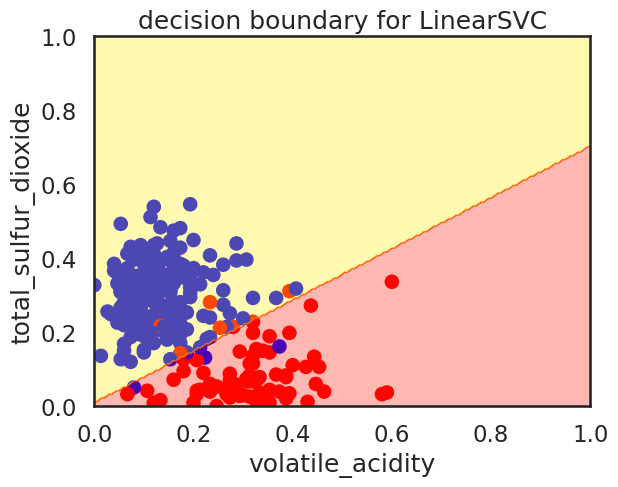

In [36]:
X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'blue')

ax = plt.axes()
ax.scatter(X_color.iloc[:, 0], X_color.iloc[:,1],
           color=y_color, alpha=1)
# ---------------------------------------------------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()

X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = lsvc.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# ---------------------------------------------------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

plt.show()

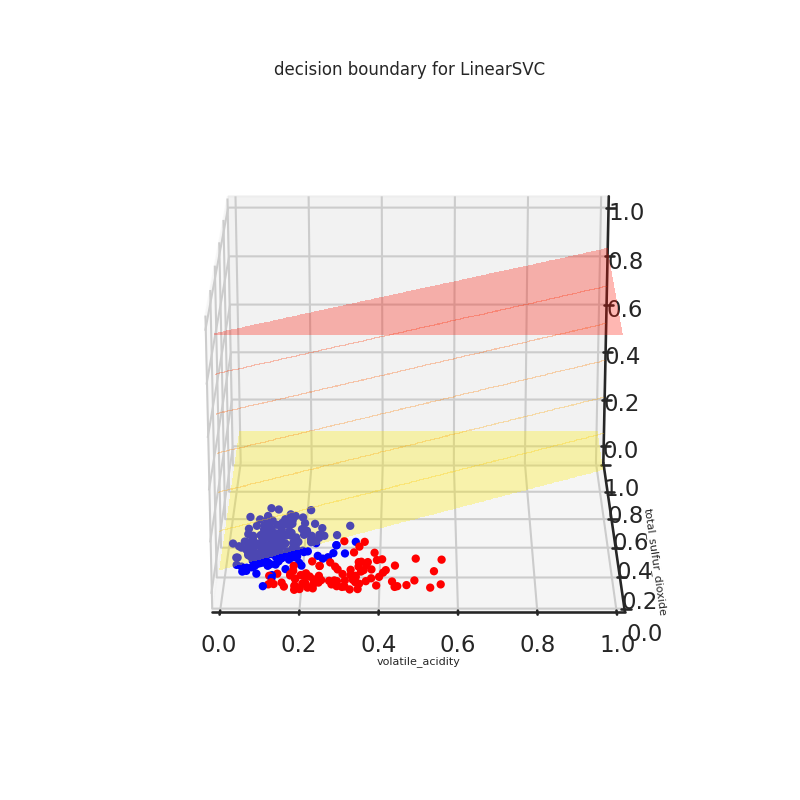

In [59]:
# Viewing using 3D plot
%matplotlib widget 

# importing required libraries 
# from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 

# creating figure 
figg = plt.figure(figsize=(8,8)) 
ax = figg.add_subplot(projection='3d') 

# creating the plot 
ax.scatter(X_color.iloc[:, 0], X_color.iloc[:,1],
           color=y_color, alpha=1) 
# ---------------------------------------------------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = lsvc.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel(fields[0], fontsize=8)  # X-axis label
ax.set_ylabel(fields[1], fontsize=8)  # Y-axis label
ax.set_title('decision boundary for LinearSVC', fontsize=12, pad=15)  # Title
ax.view_init(elev=20, azim=270)  # Adjust elevation & azimuth angle

plt.show()

## Part 3: Gaussian Kernel

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> Fit model
     <li> Get sample 300 records from X and the corresponding y's
     <li> Create grid, predict, plot using ax.contourf
     <li> Add on the scatter plot
    </ol>
* After copying and pasting code, the finished function uses the input `estimator` and not the LinearSVC model.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, we plot the decision boundary for various values of `C`: 
`[.1, 1, 10]`


**Test Defined Function**

In [38]:
from sklearn.svm import SVC
# RBF = Radial Basis Function (makes data linearly separable in higher dimensions)
svc_gsian = SVC(kernel='rbf', gamma=.5).fit(X, y)

In [39]:
X_color = X.sample(300)
X_color

volatile_acidity_scaled  total_sulfur_dioxide_scaled
257                  0.410000                     0.115207
1200                 0.326667                     0.006912
2455                 0.200000                     0.368664
1497                 0.440000                     0.023041
2982                 0.186667                     0.221198
...                       ...                          ...
471                  0.306667                     0.105991
3582                 0.080000                     0.475806
6407                 0.180000                     0.216590
3775                 0.160000                     0.255760
5691                 0.280000                     0.244240

[300 rows x 2 columns]

In [40]:
y_color = y.loc[X_color.index]
y_color

257     1
1200    1
2455    0
1497    1
2982    0
       ..
471     1
3582    0
6407    0
3775    0
5691    0
Name: color, Length: 300, dtype: int32

In [41]:
y_color = y_color.map(lambda r: 'red' if r == 1 else 'blue')
y_color

257      red
1200     red
2455    blue
1497     red
2982    blue
        ... 
471      red
3582    blue
6407    blue
3775    blue
5691    blue
Name: color, Length: 300, dtype: object

In [42]:
x_axis, y_axis = np.arange(0,1,.005), np.arange(0,1,.005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
xx_ravel.ndim, yy_ravel.shape

(1, (40000,))

In [43]:
pd.DataFrame([xx_ravel, yy_ravel])

0      1      2      3      4      5      6      7      8      9      ...  \
0    0.0  0.005   0.01  0.015   0.02  0.025   0.03  0.035   0.04  0.045  ...   
1    0.0  0.000   0.00  0.000   0.00  0.000   0.00  0.000   0.00  0.000  ...   

   39990  39991  39992  39993  39994  39995  39996  39997  39998  39999  
0  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.985  0.990  0.995  
1  0.995  0.995  0.995  0.995  0.995  0.995  0.995  0.995  0.995  0.995  

[2 rows x 40000 columns]

In [44]:
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
X_grid

0      1
0      0.000  0.000
1      0.005  0.000
2      0.010  0.000
3      0.015  0.000
4      0.020  0.000
...      ...    ...
39995  0.975  0.995
39996  0.980  0.995
39997  0.985  0.995
39998  0.990  0.995
39999  0.995  0.995

[40000 rows x 2 columns]

In [45]:
y_grid_predictions = svc_gsian.predict(X_grid).reshape(xx.shape)
y_grid_predictions

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

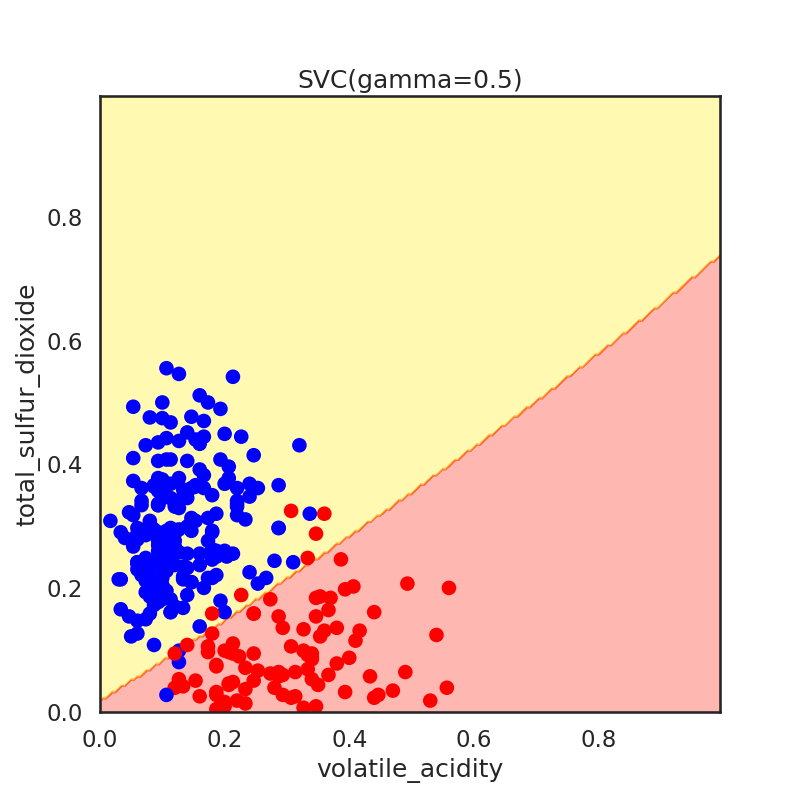

In [46]:
fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
ax.scatter(X_color.iloc[:,0], X_color.iloc[:,1], color=y_color, alpha=1)
ax.set(xlabel=fields[0], ylabel=fields[1], title=str(svc_gsian))
plt.show()

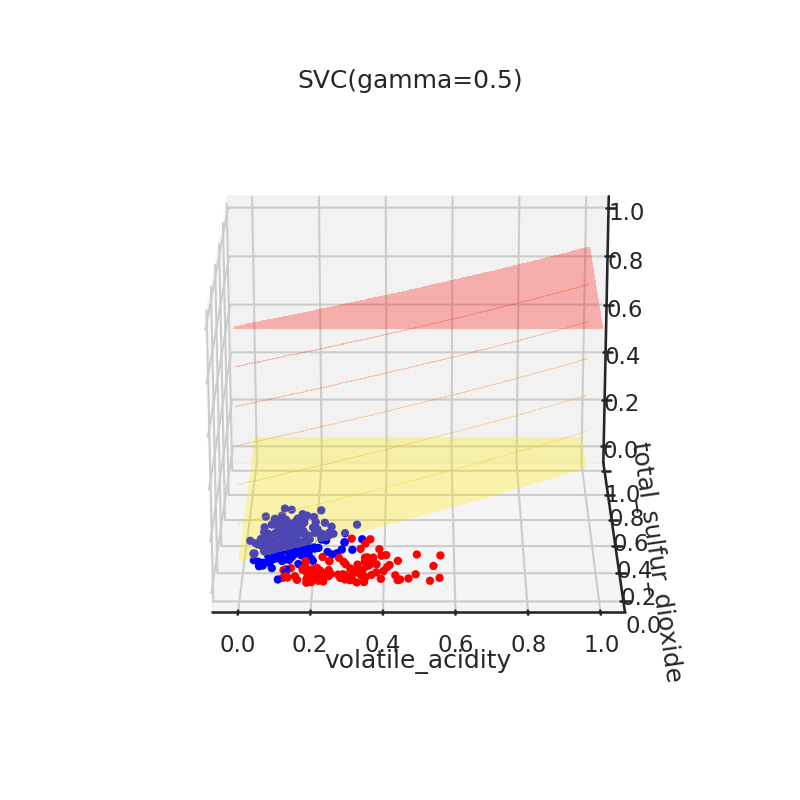

In [47]:
# 3D plots
# Viewing using 3D plot
%matplotlib widget 

# importing required libraries 
# from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 

# creating figure 
figg = plt.figure(figsize=(8,8)) 
ax = figg.add_subplot(projection='3d') 

# creating the plot 
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
ax.scatter(X_color.iloc[:,0], X_color.iloc[:,1], color=y_color, alpha=1)
ax.set(xlabel=fields[0], ylabel=fields[1], title=str(svc_gsian))
ax.view_init(elev=20, azim=270)  # Adjust elevation & azimuth angle

plt.show()

In [48]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'blue')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

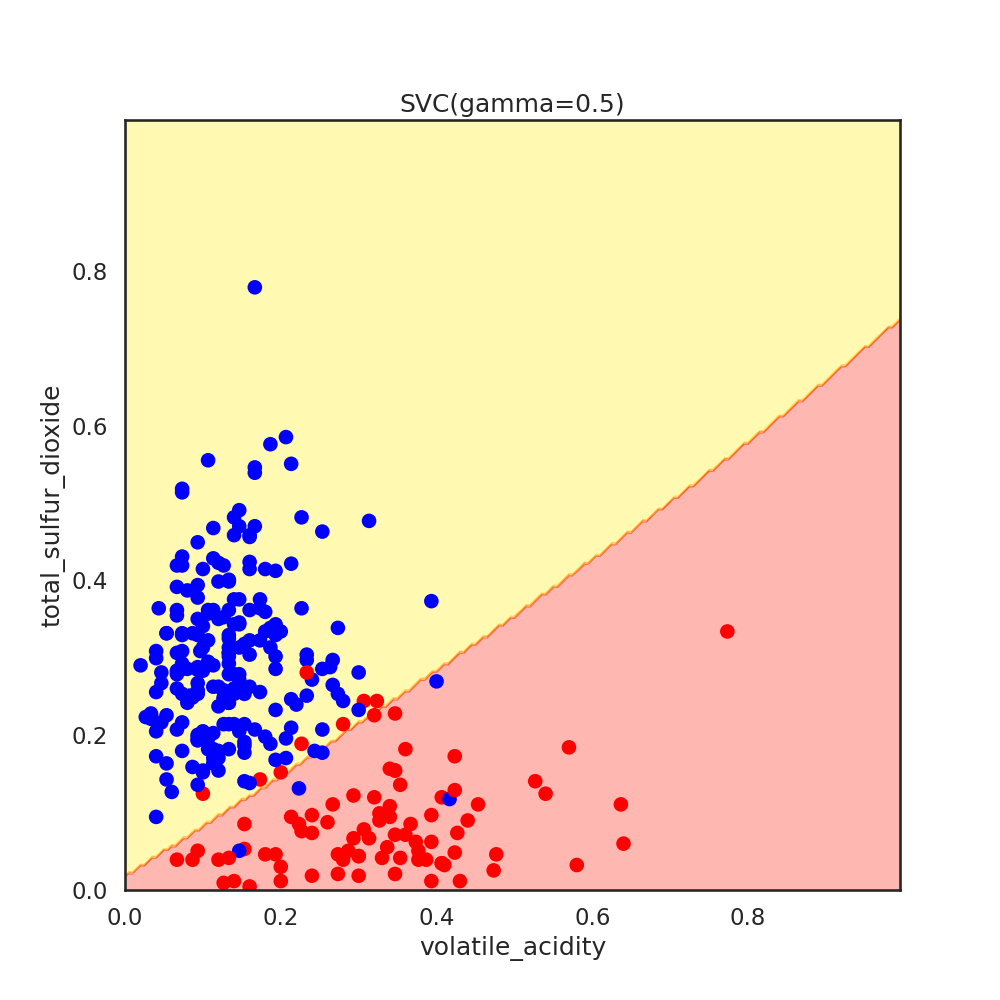

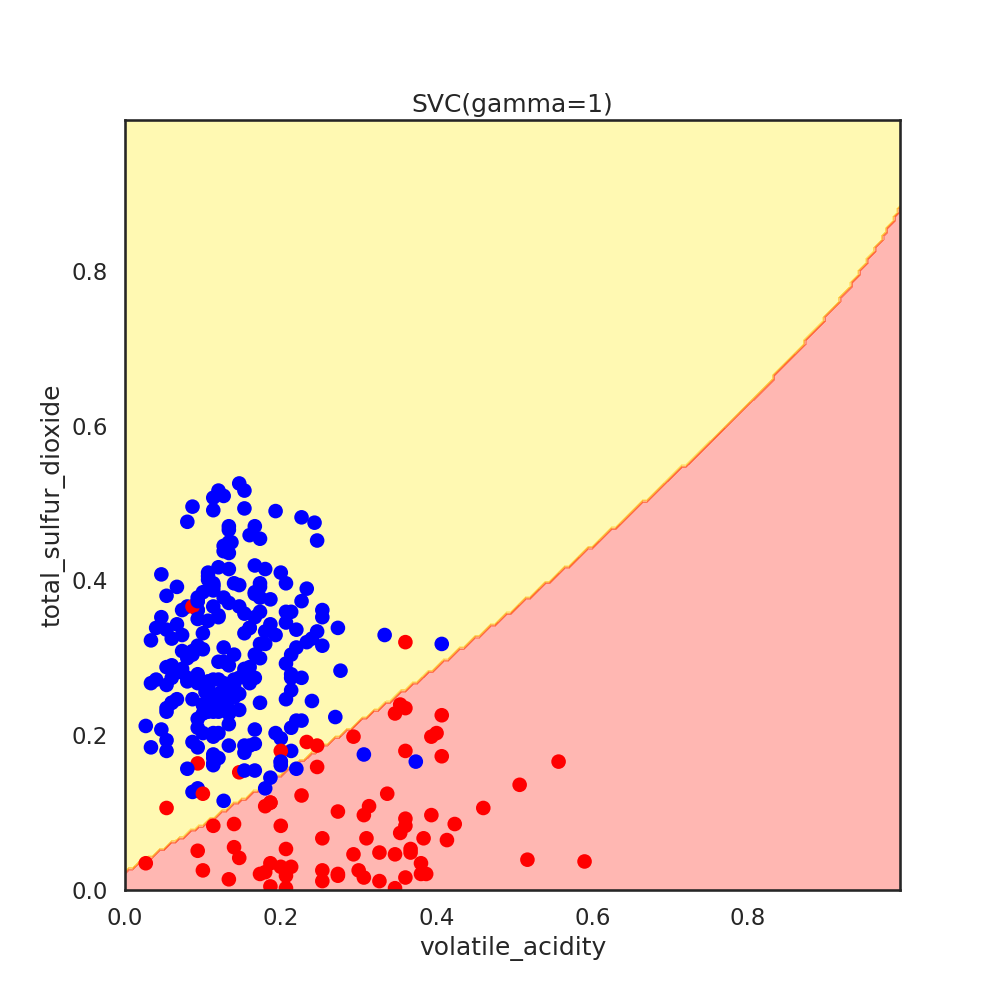

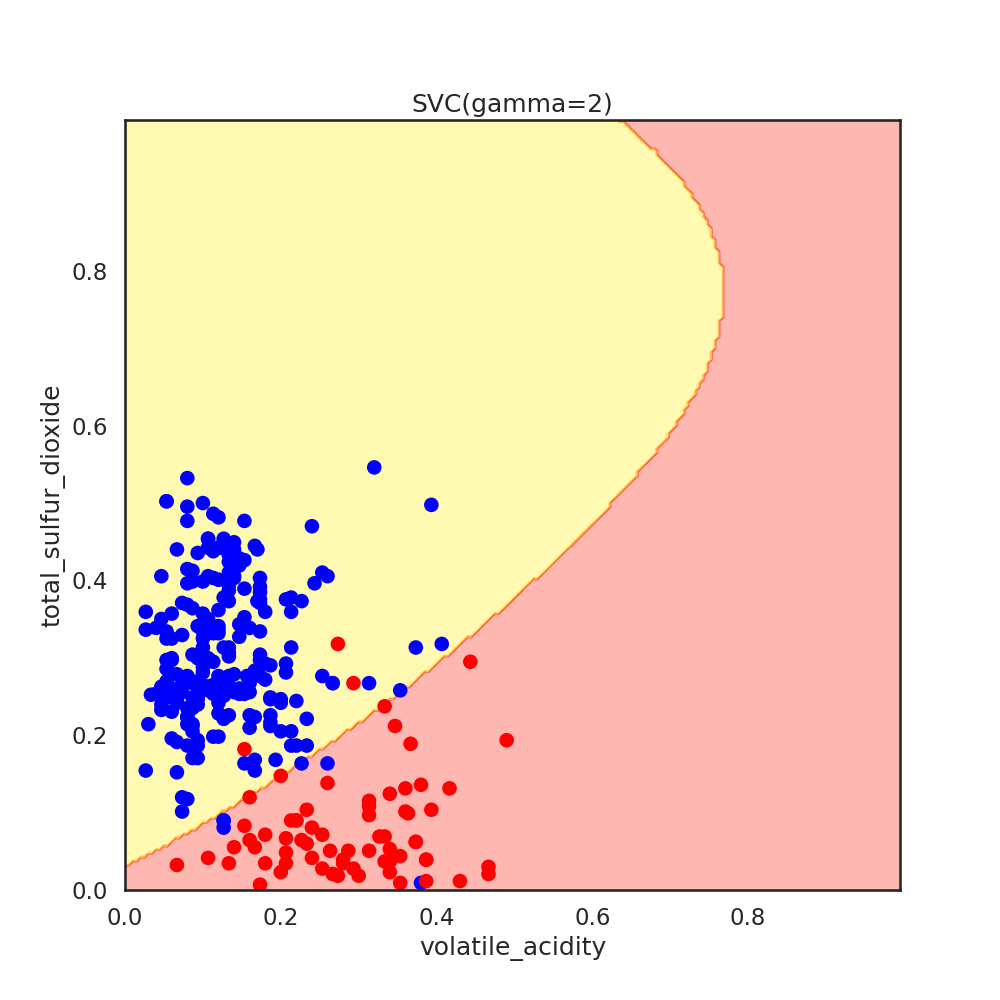

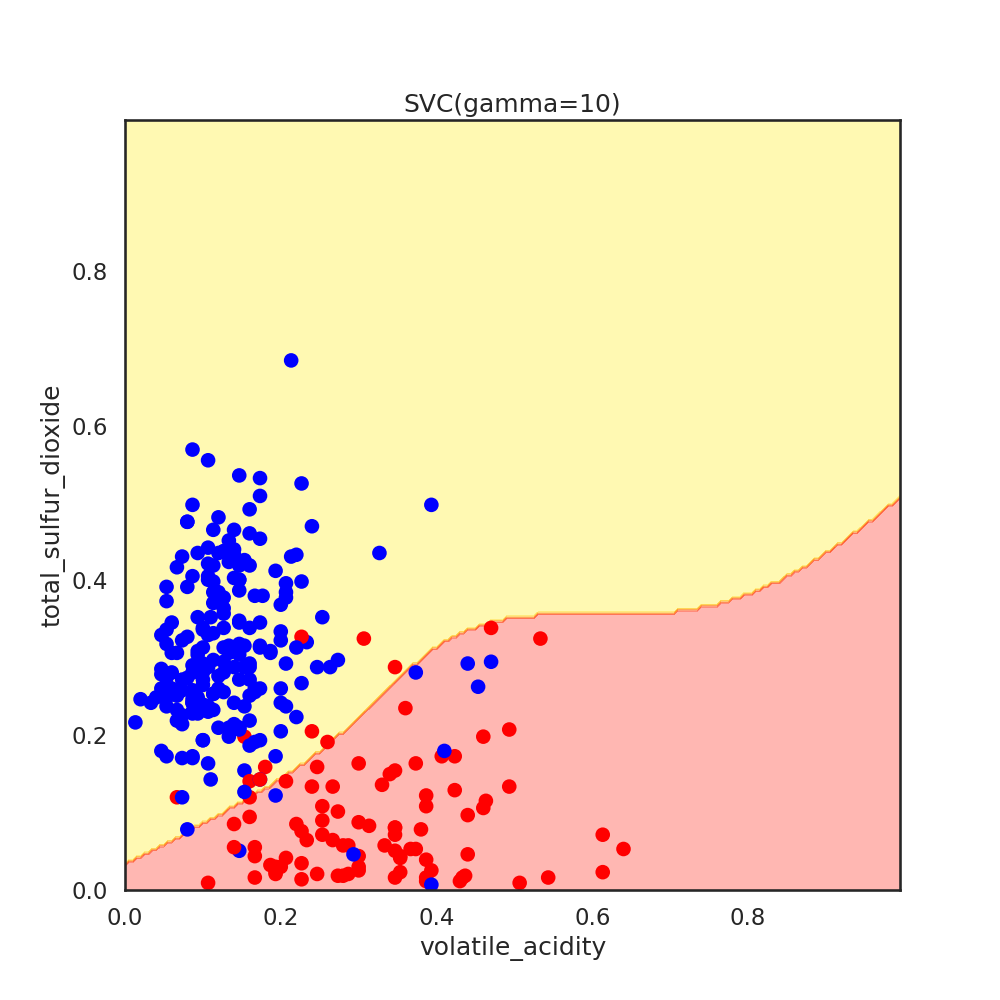

In [49]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

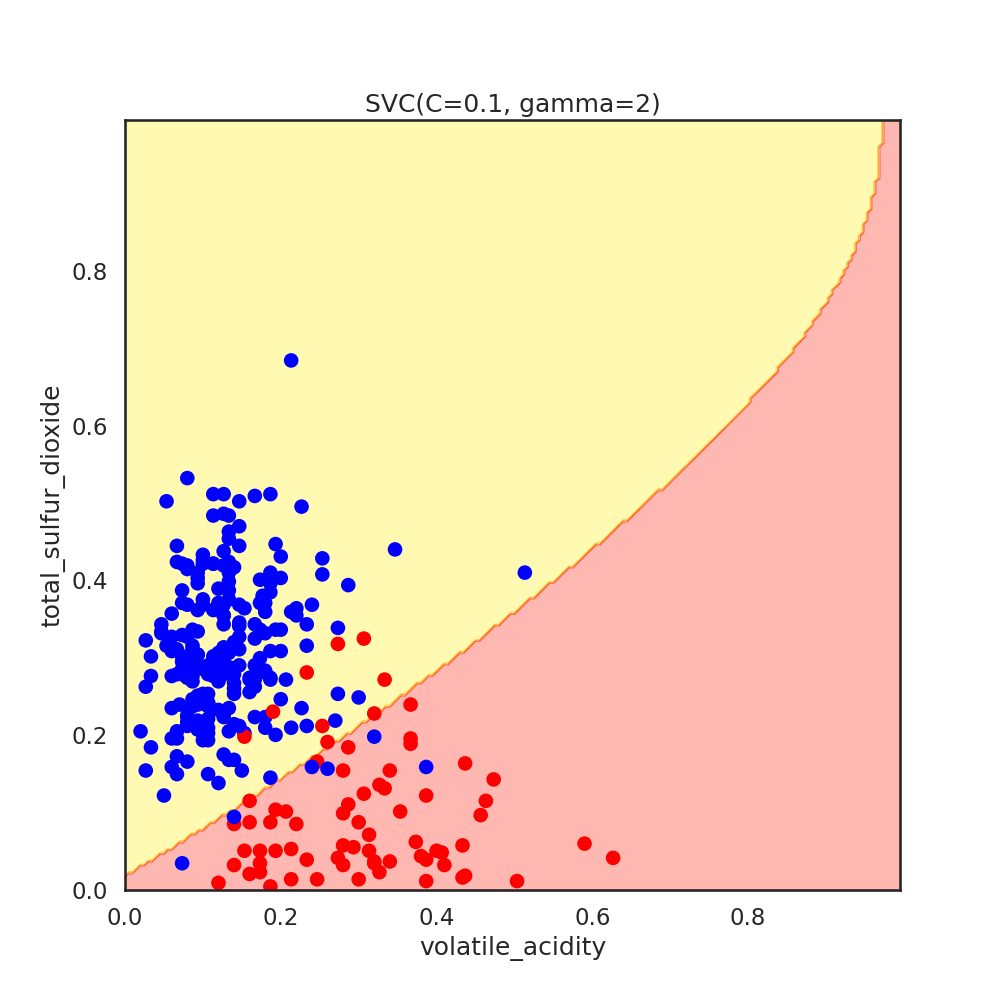

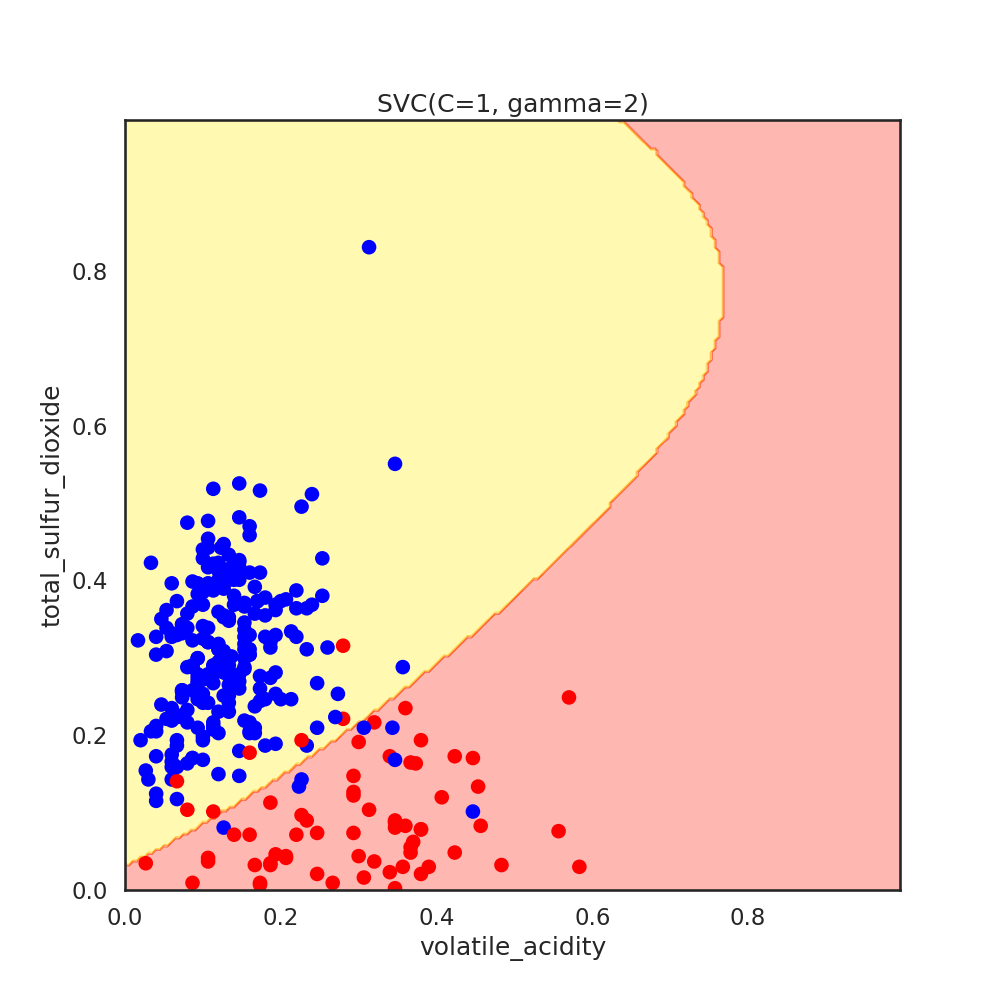

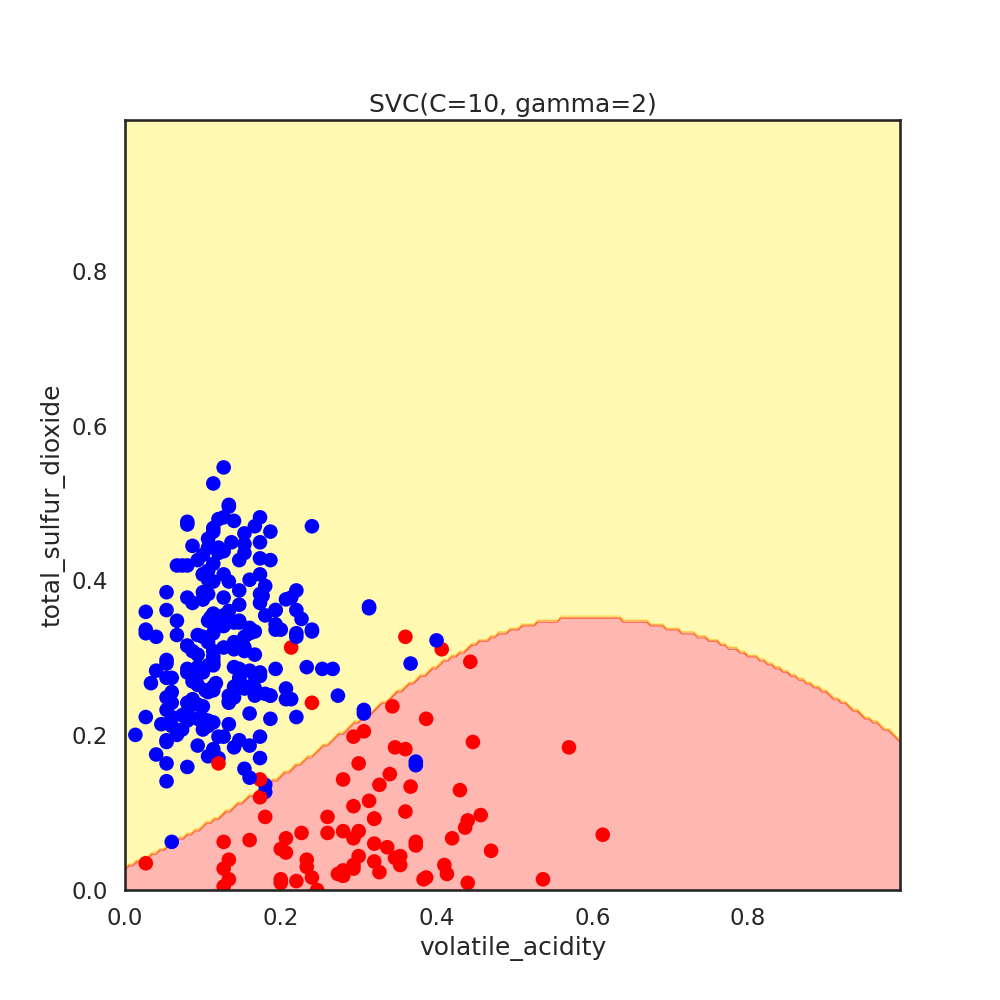

In [50]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

## Part 4: Comparing Kernel Execution Times

In this exercise, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If we type **`%%timeit`** in the beginning of the cell, it will output the execution time.

We proceed with the following steps:
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much less to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above


In [51]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [52]:
y = data.color == 'red'
X = data[data.columns[:-1]]

In [53]:
karg = {'kernel':'rbf'}
svc = SVC(**karg)
nystroem = Nystroem(**karg)
sgd = SGDClassifier()  # Stochastic Gradient Descent

In [54]:
%%timeit
svc.fit(X,y)

1.54 s ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

372 ms ± 5.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [57]:
%timeit svc.fit(X2, y2)

37.1 s ± 439 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

1.88 s ± 122 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


---
### Machine Learning Foundation (C) 2020 IBM Corporation
